# **Graficas de resultados**

## *Objetivo:* Analizar los resultados por medio de gráficas para hallar relaciones implícitas en los clusters.

### 1. Se cargan librerías y se declaran variables

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import statistics
import warnings
from colorspacious import cspace_converter
from mpl_toolkits.mplot3d import Axes3D
import statistics
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = "12"

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")


colors_list = ['#CC0000', '#0059CC', '#009900', '#CC6600', '#6600CC', '#CCAC00', '#00A5A6']
colors_list1 = ['#00A5A6', '#009900', '#CC6600', '#0059CC', '#6600CC', '#CC0000', '#CCAC00']

file='datos/df_cluster.csv'
df = pd.read_csv(file)
df.head()

,Formule,Ele,BG,Structure,CA,cluster
0,BaS3,Ba-S,1.3913,2,62546.518850,3
1,CdF2,Cd-F,2.8977,1,1582.356544,4
2,BeTe,Be-Te,2.0173,1,10109.303511,4
3,UO3,O-U,1.6350,1,228128.774945,1
4,Rb2Te,Rb-Te,1.8766,1,65916.018982,3


### 2. Analizando número de materiales en los clusters

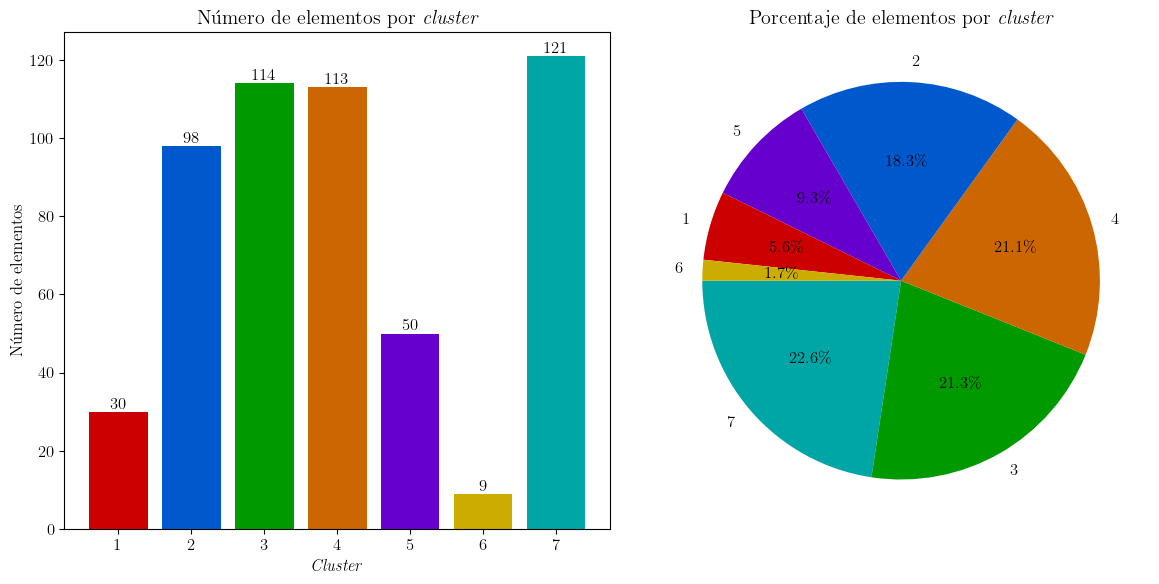

In [2]:
# Contar los elementos por clúster
cluster_counts = df['cluster'].value_counts()

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico de barras
ax_bar = axs[0]
ax_bar.bar(cluster_counts.index, cluster_counts.values, color=colors_list1)
ax_bar.set_title(r'Número de elementos por \textit{cluster}')
ax_bar.set_xlabel(r'\textit{Cluster}')
ax_bar.set_ylabel('Número de elementos')

# Añade etiquetas numéricas en cada barra
for p in ax_bar.patches:
    ax_bar.annotate(str(p.get_height()), 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

# Gráfico de pastel
ax_pie = axs[1]
ax_pie.pie(cluster_counts, 
            labels=cluster_counts.index, 
            colors=colors_list1,
            autopct='%1.1f\%%', 
            startangle=180)

ax_pie.set_title(r'Porcentaje de elementos por \textit{cluster}')

# Mostrar gráfica
plt.tight_layout()
plt.show()

### 3. Analizando band gap y coeficiente de absorción por cluster

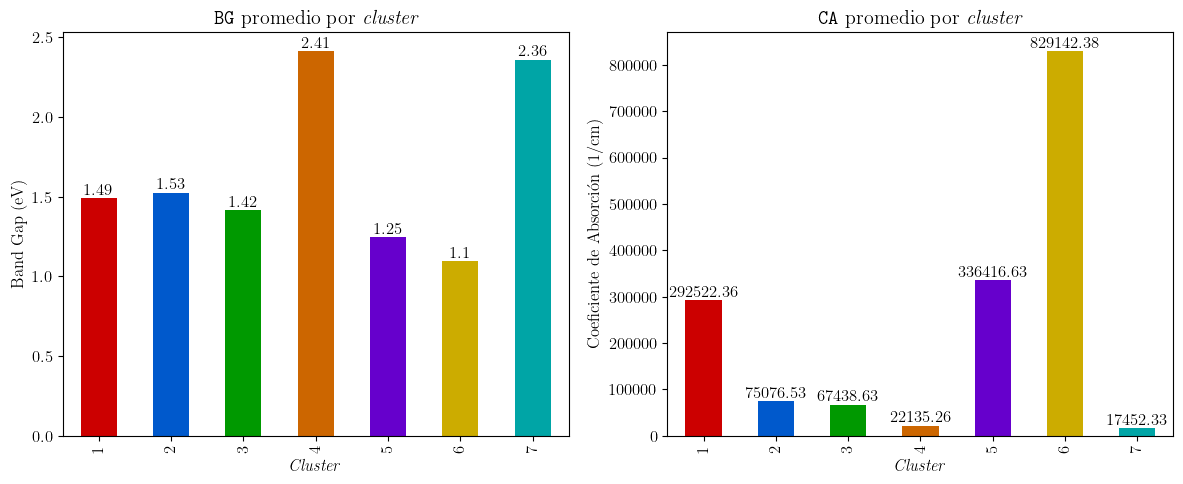

In [3]:
# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfica 1: BG promedio por clúster ---
ax1 = df.groupby('cluster')['BG'].mean().plot(kind='bar', color=colors_list[0:7], ax=ax1)
ax1.set_title(r'\texttt{BG} promedio por \textit{cluster}')
ax1.set_xlabel(r'\textit{Cluster}')
ax1.set_ylabel(r'Band Gap (eV)')

# Añadir etiquetas numéricas en cada barra
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(), 2)), 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

# --- Gráfica 2: CA promedio por clúster ---
ax2 = df.groupby('cluster')['CA'].mean().plot(kind='bar', color=colors_list[0:7], ax=ax2)
ax2.set_title(r'\texttt{CA} promedio por \textit{cluster}')
ax2.set_xlabel(r'\textit{Cluster}')
ax2.set_ylabel(r'Coeficiente de Absorción (1/cm)')

# Añadir etiquetas numéricas en cada barra
for p in ax2.patches:
    ax2.annotate(str(round(p.get_height(), 2)), 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom')

# Mostrar gráfica
plt.tight_layout()
plt.show()

### 4. Analizando extructuras cristalinas en los clusters

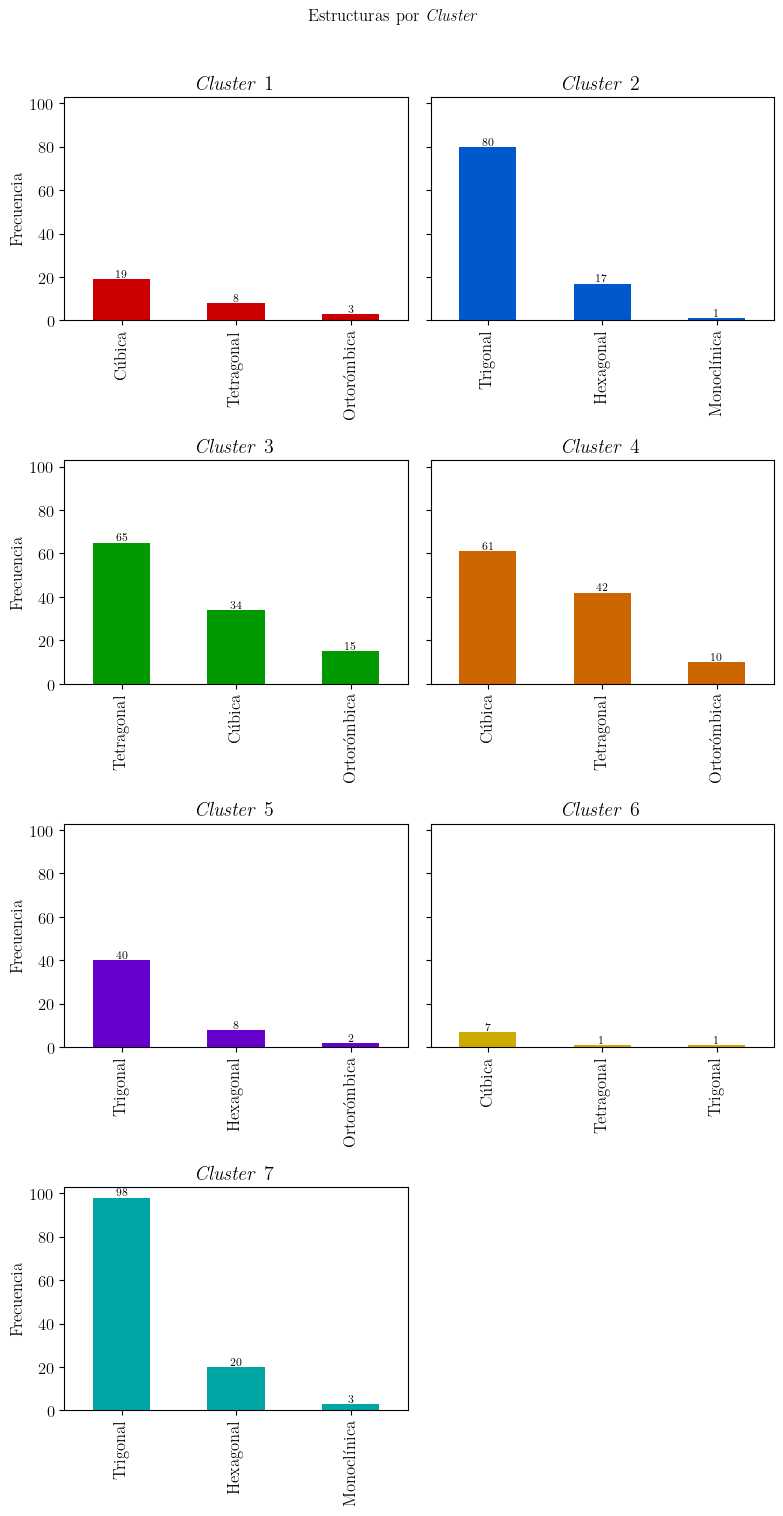

In [4]:
# Diccionario con el cambio de nombres de estructuras
cambios = {
    5: 'Trigonal',
    1: 'Cúbica',
    2: 'Tetragonal',
    4: 'Hexagonal',
    3: 'Ortorómbica',
    6: 'Monoclínica',
    7: 'Triclínica'
}

# Configuración de subplots (4 filas y 2 columnas)
fig, axes = plt.subplots(4, 2, figsize=(8, 15), sharey=True, constrained_layout=True)
fig.suptitle(r'Estructuras por \textit{Cluster}', fontsize=12, y=1.01)

# Generar los 7 gráficos de barras en una estructura 4x2
for i in range(1, 8):
    row, col = divmod(i - 1, 2)  
    ax = axes[row, col]  

    # Generar gráfico de barras para la estructura del cluster `i`
    df[df['cluster'] == i]['Structure'].value_counts().sort_values(ascending=False).plot(
        kind='bar', color=colors_list[i - 1], ax=ax
    )
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=8)

    # Configurar título, etiquetas y leyenda
    ax.set_title(r'\textit{Cluster }'+f'{i}')
    ax.set_xlabel('')
    ax.set_ylabel(r'Frecuencia')

    # Obtener los valores originales y reemplazarlos por los nombres del diccionario `cambios`
    x_ticks = list(df[df['cluster'] == i]['Structure'].value_counts().index)
    ax.set_xticks(range(len(x_ticks)))
    ax.set_xticklabels([cambios.get(tick, tick) for tick in x_ticks])

# Eliminar el subplot vacío en la posición (3,1)
fig.delaxes(axes[3, 1])

# Mostrar gráfica
plt.tight_layout()
plt.show()

### 5. Analizando relación entre band gap, coeficiente de absorción y estructura crsitalina en cada cluster

<Figure size 4000x4000 with 0 Axes>

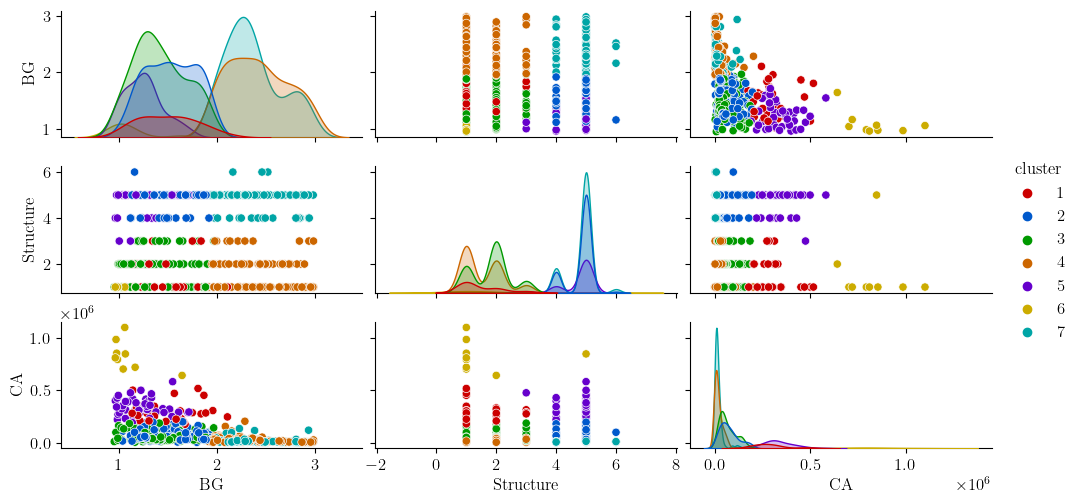

In [5]:
#Comparando a pares las variables
fig = plt.figure(figsize=(40, 40))
sns.pairplot(df, hue="cluster",  palette=colors_list,height=1.7,aspect=2)
plt.show()

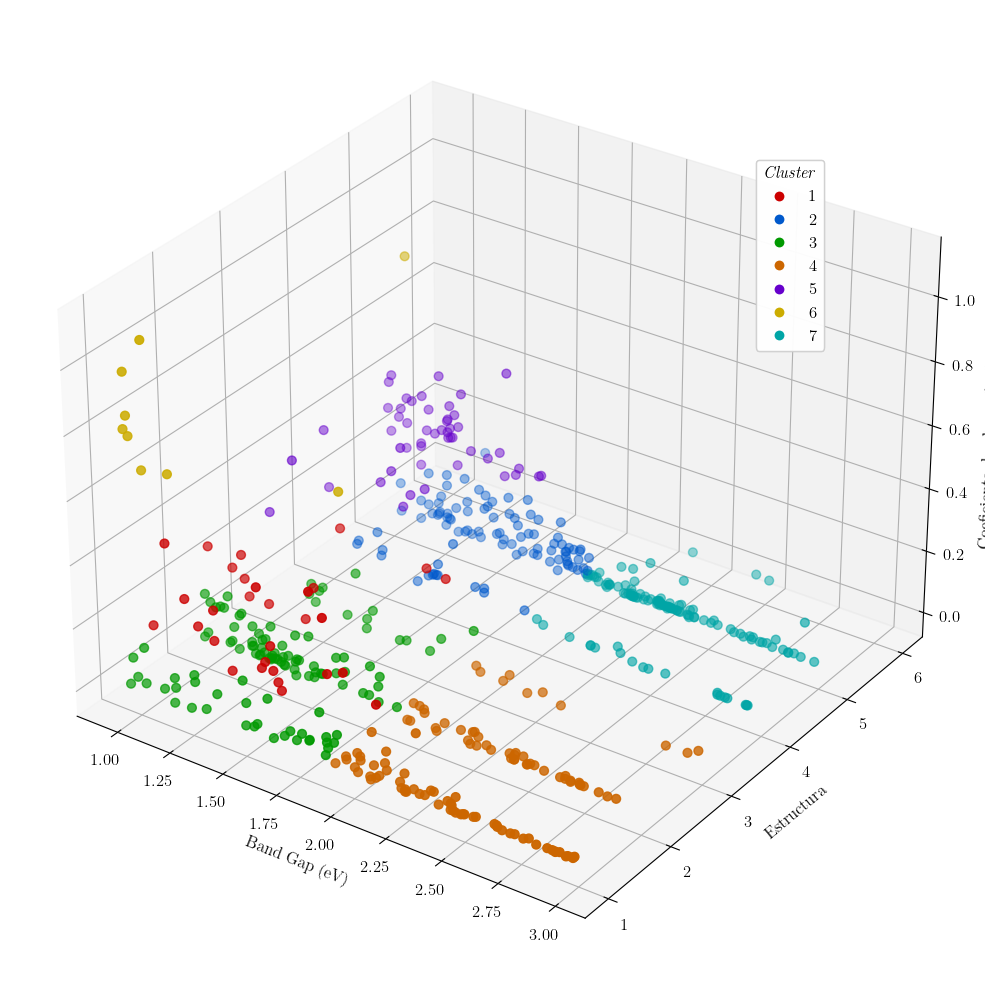

In [6]:
plt.rcParams['text.usetex'] = True

fig = plt.figure(figsize=(10, 10))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')

x = df['BG']
y = df['Structure']
z = df['CA']
colors = df['cluster']
cmap = matplotlib.colors.ListedColormap(colors_list[0:7])
g=ax.scatter(x, y, z, s=40,  c =  colors  , cmap=cmap  )

ax.set_xlabel('Band Gap (eV)')
ax.set_ylabel('Estructura')
ax.set_zlabel('Coeficiente de absorción (1/cm)')

legend = ax.legend(*g.legend_elements(), loc="upper right", title=r"\textit{Cluster}", borderaxespad=9, ncol=1)
ax.add_artist(legend)
ax.view_init(elev=30, azim=-55, roll=0)

# Mostrar gráfica
plt.tight_layout()
plt.show()

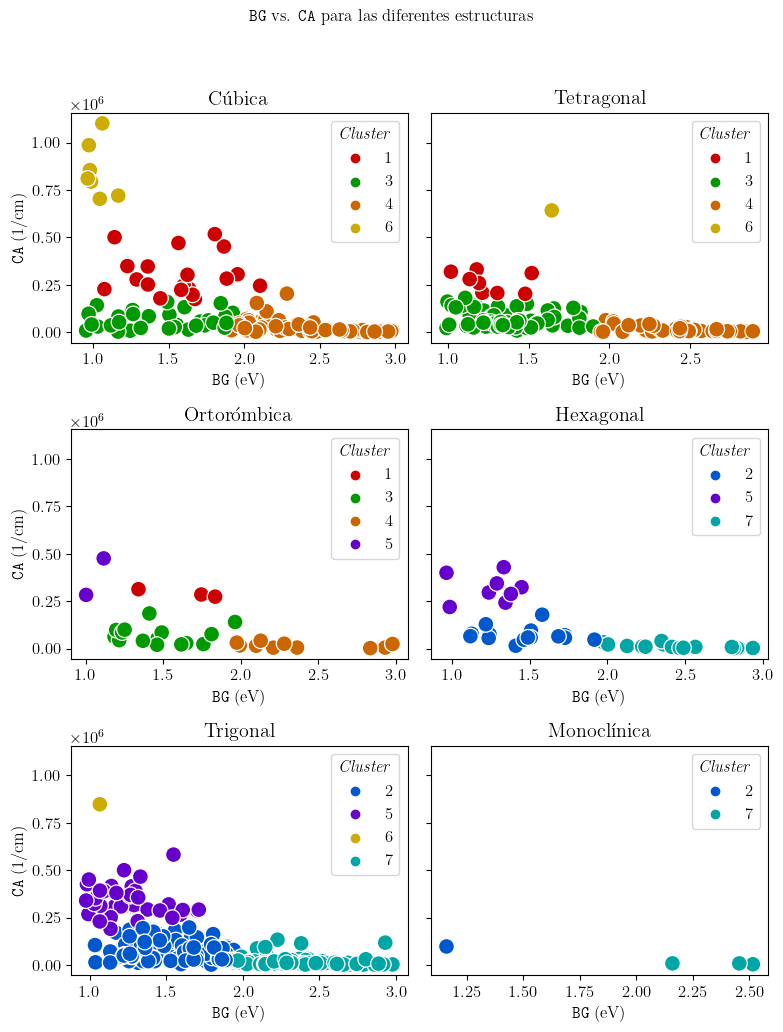

In [7]:
# Configuración de subplots (4 filas y 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(8,10), sharey=True, constrained_layout=True)

# Configuración de colores
palette_colors = ['#FF0000', '#00CC00', '#FF8000', '#FFD700']

cambios={
    5:'Trigonal',
    1:'Cúbica',
    2:'Tetragonal',
    4:'Hexagonal',
    3:'Ortorómbica',
    6:'Monoclínica'
}

fig.suptitle(r'\texttt{BG} vs. \texttt{CA} para las diferentes estructuras', fontsize=12, y=1.03)

# Generar los 7 scatterplots en una estructura 4x2
for i in range(6):
    lsi=[]
    for cluster in df[df['Structure'] == (i + 1)].groupby('cluster').count().index:
        lsi.append(colors_list[cluster-1])
    row, col = divmod(i, 2)  # Calcular fila y columna
    sns.scatterplot(
        x='BG', y='CA', hue='cluster',
        palette=lsi,
        data=df[df['Structure'] == (i + 1)],  # Filtra cada estructura (1 al 7)
        s=130, ax=axes[row, col]
    )
    axes[row, col].set_title(cambios[i+1])
    axes[row, col].legend(loc='upper right',title=r"\textit{Cluster}")
    axes[row, col].set_xlabel(r'\texttt{BG} (eV)')
    axes[row, col].set_ylabel(r'\texttt{CA} (1/cm)')

# Mostrar gráfica
plt.tight_layout()
plt.show()

### 6. Analizando elementos contenidos en cada cluster

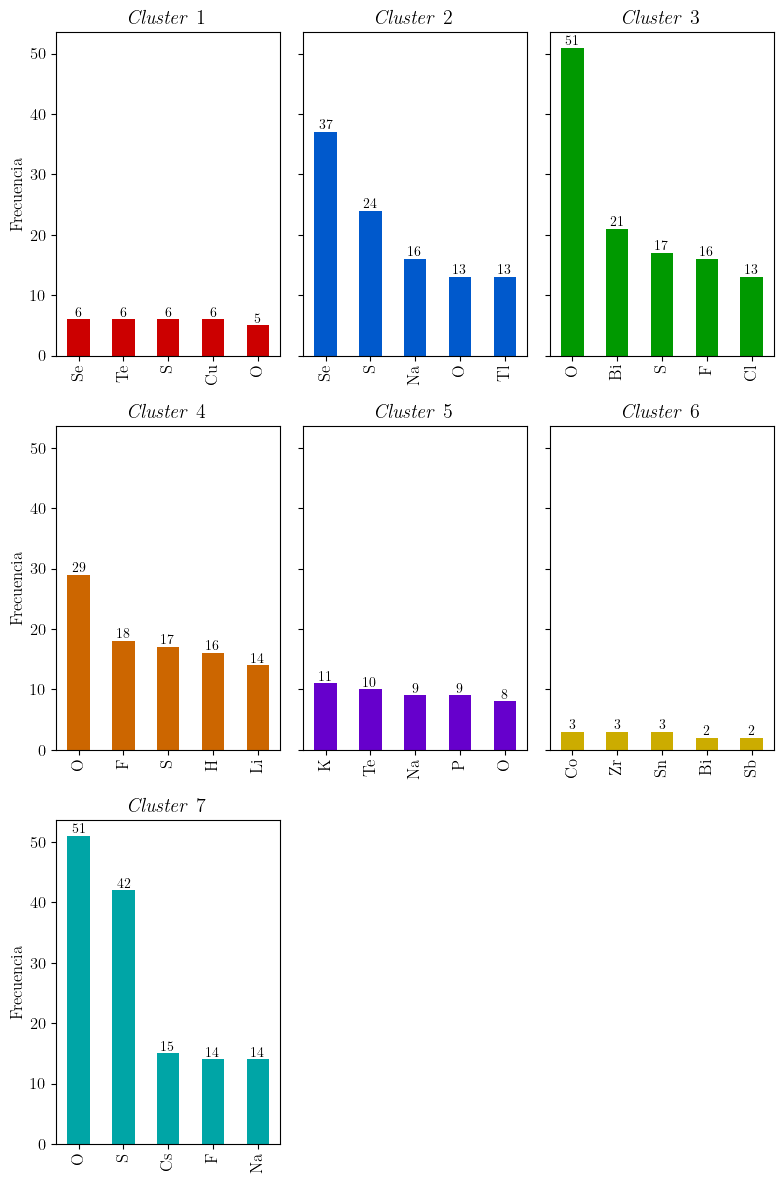

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(8, 12),sharey=True)  # Crear un grid de 3x3
axes = axes.flatten()  # Aplanar para iterar fácilmente

for i in range(1, 8):
    n = str(i)
    lista_ele = []
    
    # Filtrar el DataFrame según el cluster actual
    for p in range(len(df[df['cluster'] == int(n)])):
        lista_ele.append(df[df['cluster'] == int(n)]['Ele'].values[p].split('-'))
    
    # Aplanar la lista de listas
    lista_ele = [item for items in lista_ele for item in items]
    
    # Crear el DataFrame y calcular la frecuencia de cada elemento
    df_ele = pd.DataFrame(lista_ele, columns=[f'Cluster {n}'])
    df_ele = pd.DataFrame(df_ele[f'Cluster {n}'].value_counts()).head()
    
    # Graficar en el subplot correspondiente con un color diferente
    ax = df_ele.plot(kind='bar', ax=axes[i - 1], color=colors_list[i - 1], legend=False)
    axes[i - 1].set_title(r'\textit{Cluster }'+f'{i}')
    
    # Configurar etiquetas de los ejes
    axes[i - 1].set_xlabel("")
    axes[i - 1].set_ylabel("Frecuencia")
    
    # Agregar el valor del eje y sobre cada barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Ocultar los subplots vacíos
for j in range(7, len(axes)):
    axes[j].axis('off')

# Mostrar gráfica
plt.tight_layout()
plt.show()

### 7. Analizando tipos de compuestos en cada cluster

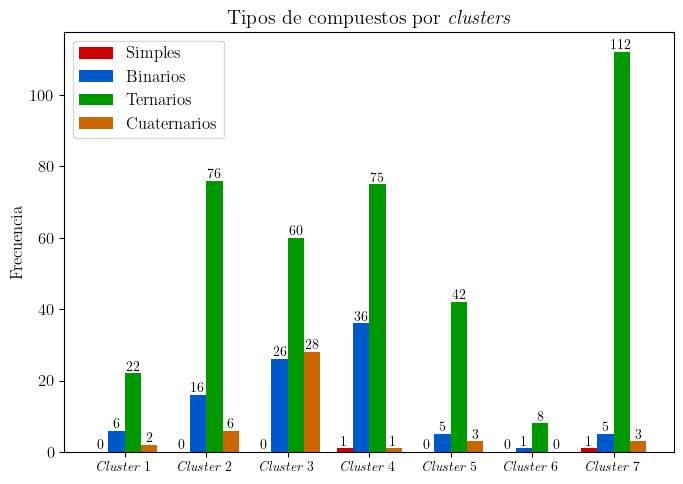

In [9]:
# Datos de los clusters
clusters = [r'\textit{Cluster} 1', r'\textit{Cluster} 2', r'\textit{Cluster} 3', r'\textit{Cluster} 4', r'\textit{Cluster} 5', r'\textit{Cluster} 6', r'\textit{Cluster} 7']
solo = [0, 0, 0, 1, 0, 0, 1]
binarios = [6, 16, 26, 36, 5, 1, 5]
terciarios = [22, 76, 60, 75, 42, 8, 112]
cuaternarios = [2, 6, 28, 1, 3, 0, 3]

# Configuración de la gráfica
x = np.arange(len(clusters))
width = 0.2  

# Creación de la gráfica de barras agrupadas con tonos de gris
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width*1.5, solo, width, label='Simples', color=colors_list[0])
ax.bar(x - width*0.5, binarios, width, label='Binarios', color=colors_list[1])
ax.bar(x + width*0.5, terciarios, width, label='Ternarios', color=colors_list[2])
ax.bar(x + width*1.5, cuaternarios, width, label='Cuaternarios', color=colors_list[3])

# Agregar valores a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Etiquetas y título
ax.set_title(r'Tipos de compuestos por \textit{clusters}')
ax.set_ylabel('Frecuencia')
ax.set_xticks(x)
ax.set_xticklabels(clusters, fontsize=10)
ax.legend()

# Mostrar gráfica
plt.tight_layout()
plt.show()


### 8. Analizando elementos en el cluster 4

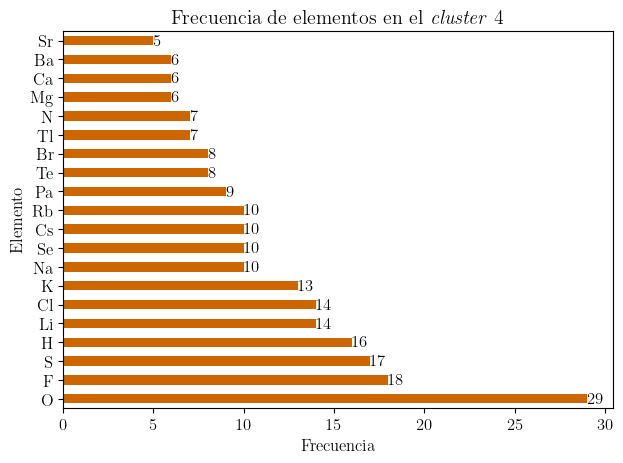

In [11]:
lista_ele = []
for p in range(len(df[df['cluster'] == 4])):
    lista_ele.append(df[df['cluster'] == 4]['Ele'].values[p].split('-'))

# Aplanar la lista de listas
lista_ele = [item for items in lista_ele for item in items]

# Crear el DataFrame y calcular la frecuencia de cada elemento
df_ele = pd.DataFrame(lista_ele, columns=['Element'])
df_ele_counts = pd.DataFrame(df_ele['Element'].value_counts()).head(20)
df_ele_counts.columns = ['Frequency']  # Renombramos la columna para evitar errores

# Definir el color para la gráfica (ejemplo con color 'skyblue')
ax = df_ele_counts.plot(kind='barh', color='#CC6600', legend=False)
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Elemento')
ax.set_title(r'Frecuencia de elementos en el \textit{cluster} 4')

# Agregar valores de frecuencia en cada barra
for index, value in enumerate(df_ele_counts['Frequency']):
    ax.text(value, index, str(value), va='center')
# Mostrar gráfica
plt.tight_layout()
plt.show()